# IMAGE CLASSIFICATION NN PROJEKT - STAR WARS
### Radosław Praski

Project contains image classification script. Image classification is based on a Neural Network idea. Moreover, Neural Network as Convolutional Neural Network. 
Image classification dataset contains images from Star Wars movies. There are variety of characters, divided into catalogues, classified by Names of each (including robots!).

Project scheme:
1. Image dataset check
2. Image dataset preparation
3. Image dataset loading
4. Dataset separation to train, test and validiation data (action could be done earlier)
5. Image preparation
6. CNN application
7. Building learning model
8. Checking model
9. Cross Validiation
10. Conclusions

To operate on a script, user needs to download Star Wars Image dataset. Dataset to find: https://www.kaggle.com/datasets/mathurinache/star-wars-images. However, user needs to optimalize the data via:
1. Download the dataset.
2. Delete catalogues "Kenobi" and "Rey".
3. Change the name of catalogue "Padm+ę Amidala" to "Padme Amidala"
4. Open script "Train_Test_Split.ipynb" and change paths to appropriate.
5. Run script "Train_Test_Split.ipynb" to separate the data to train test catalogues.
5. From destination folder delete "val" catalogue.

#### Requred packages loading/importing

In [ ]:
!pip install opencv-python

In [1]:
from tensorflow.keras.layers import Conv2D, Input, Lambda, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Plotting random images from dataset

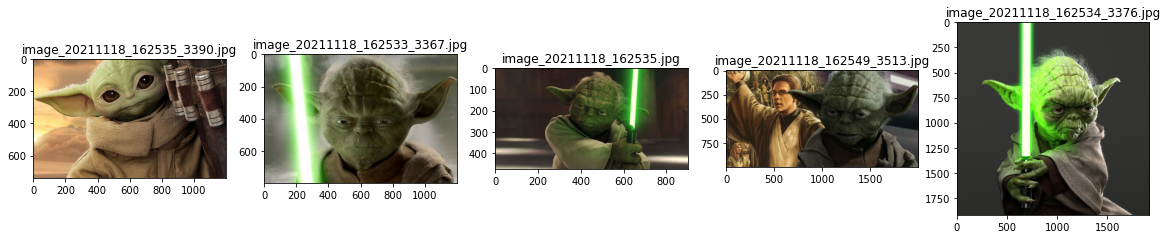

In [2]:
plt.figure(figsize=(20,20))
img_folder=r'E:\\Radek\\Szkolenia\\Data_Science\\Projekt\\Star_Wars_Data\\SW_Dataset_Edited_Splitted3\\train\\Yoda'
for i in range(5):
    file_v = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file_v)
    img_v=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file_v)
    plt.imshow(img_v)

#### Image data loading

In [3]:
train_path=r"E:\\Radek\\Szkolenia\\Data_Science\\Projekt\\Star_Wars_Data\\SW_Dataset_Edited_Splitted3\\train"
val_path="E:\\Radek\\Szkolenia\\Data_Science\\Projekt\\Star_Wars_Data\\SW_Dataset_Edited_Splitted3\\val"
test_path="E:\\Radek\\Szkolenia\\Data_Science\\Projekt\\Star_Wars_Data\\SW_Dataset_Edited_Splitted3\\test"

data_paths = (train_path, val_path, test_path)

In [ ]:
train_X=[]

for folder in os.listdir(train_path):

    sub_path=train_path + "\\" + folder

    for img in os.listdir(sub_path):

        image_path=sub_path + "\\" + img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        train_X.append(img_arr)

In [ ]:
test_X=[]

for folder in os.listdir(test_path):

    sub_path=test_path + "\\" + folder

    for img in os.listdir(sub_path):

        image_path=sub_path + "\\" + img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        test_X.append(img_arr)

In [ ]:
val_X=[]

for folder in os.listdir(val_path):

    sub_path=val_path + "\\" + folder

    for img in os.listdir(sub_path):

        image_path=sub_path + "\\" + img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        val_X.append(img_arr)

#### Image size checking for choosing correct, similar size

In [4]:
img_size = []

for folder in os.listdir(train_path):

    sub_path=train_path + "\\" + folder

    for img in os.listdir(sub_path):

        image_path=sub_path + "\\" + img

        img_arr=cv2.imread(image_path)
        
        img_size.append(img_arr.shape[0:2])
        
img_size_df = pd.DataFrame(img_size, columns = ['Width', 'Height'])

In [5]:
img_size_df.head()

,Width,Height
0,1236,981
1,900,900
2,900,900
3,900,900
4,900,900


In [6]:
img_size_df.describe()

,Width,Height
count,404.000000,404.000000
mean,1060.245050,1206.853960
std,583.299434,557.538338
min,150.000000,250.000000
25%,708.750000,800.000000
50%,900.000000,1076.000000
75%,1199.000000,1540.000000
max,4156.000000,5184.000000


In [7]:
target_size = (200, 200, 3) # chosen size of images

#### Standard and Augmented Data Generator

In [8]:
train_generator = ImageDataGenerator(rescale=1/255)
valid_generator = ImageDataGenerator(rescale=1/255)
test_generator = ImageDataGenerator(rescale=1/255)

print('Total number of images for "training":')
train_flow_std = train_generator.flow_from_directory(train_path,
                                                     target_size=target_size[0:2],
                                                     batch_size=32,
                                                     class_mode="categorical")
print('Total number of images for "validation":')
valid_flow_std = valid_generator.flow_from_directory(val_path,
                                                     target_size=target_size[0:2],
                                                     batch_size=32,
                                                     class_mode="categorical")
print('Total number of images for "testing":')
test_flow_std = test_generator.flow_from_directory(test_path,
                                                   target_size=target_size[0:2],
                                                   batch_size=32,
                                                   class_mode='categorical')

Total number of images for "training":
Found 404 images belonging to 7 classes.
Total number of images for "validation":
Found 105 images belonging to 7 classes.
Total number of images for "testing":
Found 140 images belonging to 7 classes.


In [9]:
train_generator = ImageDataGenerator(rescale=1./255,
                                     rotation_range=10,
                                     zoom_range=0.1,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     horizontal_flip=True,
                                     brightness_range = (0.9,1.1),
                                     fill_mode='nearest')
valid_generator = ImageDataGenerator(rescale=1/255)
test_generator = ImageDataGenerator(rescale=1/255)

print('Total number of images for "training":')
train_flow_aug = train_generator.flow_from_directory(train_path,
                                                     target_size=target_size[0:2],
                                                     batch_size=32,
                                                     class_mode="categorical")
print('Total number of images for "validation":')
valid_flow_aug = valid_generator.flow_from_directory(val_path,
                                                     target_size=target_size[0:2],
                                                     batch_size=32,
                                                     class_mode="categorical")
print('Total number of images for "testing":')
test_flow_aug = test_generator.flow_from_directory(test_path,
                                                   target_size=target_size[0:2],
                                                   batch_size=32,
                                                   class_mode='categorical')

Total number of images for "training":
Found 404 images belonging to 7 classes.
Total number of images for "validation":
Found 105 images belonging to 7 classes.
Total number of images for "testing":
Found 140 images belonging to 7 classes.


#### Classes

In [10]:
train_y=train_flow.classes
val_y=valid_flow.classes
test_y=test_flow.classes

In [10]:
n_classes = len(train_flow_std.class_indices)
n_classes

7

In [11]:
train_flow_std.class_indices

{'Anakin Skywalker': 0,
 'Kylo Ren': 1,
 'Luke Skywalker': 2,
 'Mace Windu': 3,
 'Obi-Wan': 4,
 'Qui-Gon Jinn': 5,
 'Yoda': 6}

In [12]:
category_names = [key for key in train_flow_std.class_indices]
category_names

['Anakin Skywalker',
 'Kylo Ren',
 'Luke Skywalker',
 'Mace Windu',
 'Obi-Wan',
 'Qui-Gon Jinn',
 'Yoda']

#### Visualize number of training images per category

Text(0.5, 1.0, 'Number of training images per category:')

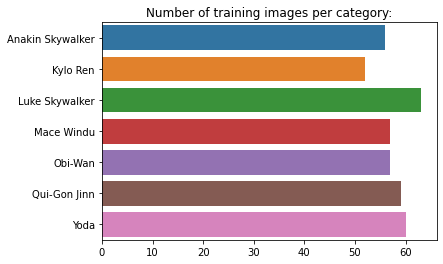

In [13]:
img_pr_cat = []
 
for category in category_names:
    sub_path = train_path + "\\" + category
    img_pr_cat.append(len(os.listdir(sub_path)))
 
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

### Building and checking own CNN model for Jedi Images

#### Standard Model within optimization

In [14]:
def std_model(input_shape):
    
    model = Sequential()
    model.add(Conv2D(8, 3, activation="relu", input_shape=input_shape))
    model.add(MaxPool2D((2,2)))
    model.add(Conv2D(16, 3, activation="relu"))
    model.add(MaxPool2D((2,2)))
    model.add(Dropout(0.1))
    model.add(Conv2D(32, 3, activation="relu"))
    model.add(MaxPool2D((2,2)))
    model.add(Flatten())
    model.add(Dense(110, "relu"))
    model.add(Dense(n_classes, "softmax"))
    
    return model

In [23]:
def deeper_std_model(input_shape):
    
    model = Sequential()
    model.add(Conv2D(16, 3, activation="relu", input_shape=input_shape))
    model.add(MaxPool2D((2,2)))
    model.add(Conv2D(32, 3, activation="relu"))
    model.add(MaxPool2D((2,2)))
    model.add(Dropout(0.1))
    model.add(Conv2D(64, 3, activation="relu"))
    model.add(MaxPool2D((2,2)))
    model.add(Flatten())
    model.add(Dense(110, "relu"))
    model.add(Dense(n_classes, "softmax"))
    
    return model

In [27]:
model_std_1 = std_model(target_size)
model_std_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 198, 198, 8)       224       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 99, 99, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 97, 97, 16)        1168      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 46, 46, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 23, 23, 32)       

In [24]:
model_std_2 = deeper_std_model(target_size)
model_std_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 64)       

Teaching model

In [16]:
early_stopping = EarlyStopping(monitor="val_accuracy", 
                               patience=5,
                               restore_best_weights=True)

In [28]:
model_std_1.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

answer_1 = model_std_1.fit(train_flow_std,
                           validation_data=valid_flow_std,
                           callbacks=[early_stopping],
                           epochs=30)

Epoch 1/30
13/13 [==============================] - 19s 1s/step - loss: 2.0713 - accuracy: 0.2376 - val_loss: 1.9196 - val_accuracy: 0.2000
Epoch 2/30
13/13 [==============================] - 17s 1s/step - loss: 1.8173 - accuracy: 0.3317 - val_loss: 1.8061 - val_accuracy: 0.3810
Epoch 3/30
13/13 [==============================] - 24s 2s/step - loss: 1.5278 - accuracy: 0.4926 - val_loss: 1.7093 - val_accuracy: 0.3619
Epoch 4/30
13/13 [==============================] - 30s 2s/step - loss: 1.2367 - accuracy: 0.5817 - val_loss: 1.5920 - val_accuracy: 0.3810
Epoch 5/30
13/13 [==============================] - 21s 2s/step - loss: 0.9332 - accuracy: 0.6708 - val_loss: 1.6419 - val_accuracy: 0.4762
Epoch 6/30
13/13 [==============================] - 28s 2s/step - loss: 0.6618 - accuracy: 0.7896 - val_loss: 1.5588 - val_accuracy: 0.4571
Epoch 7/30
13/13 [==============================] - 23s 2s/step - loss: 0.4104 - accuracy: 0.8936 - val_loss: 1.4202 - val_accuracy: 0.5143
Epoch 8/30
13/13 [==

In [32]:
answer_1

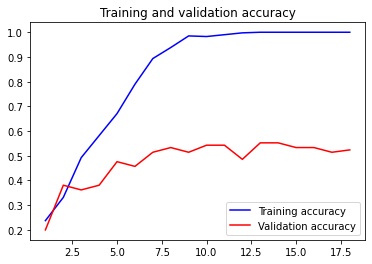

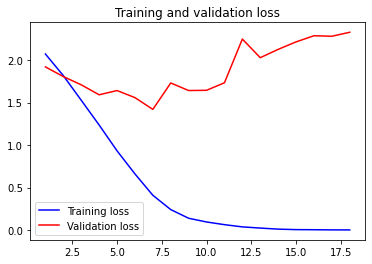

In [42]:
acc = answer_1.history['accuracy']
val_acc = answer_1.history['val_accuracy']
loss = answer_1.history['loss']
val_loss = answer_1.history['val_loss']
 
epochs = range(1,len(acc)+1)
 
plt.figure()
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
#plt.savefig('Accuracy.jpg')
 
plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
#plt.savefig('Loss.jpg')

In [29]:
model_std_2.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

answer_2 = model_std_2.fit(train_flow_std,
                           validation_data=valid_flow_std,
                           callbacks=[early_stopping],
                           epochs=50)

Epoch 1/50
13/13 [==============================] - 22s 2s/step - loss: 1.7669 - accuracy: 0.3144 - val_loss: 1.7538 - val_accuracy: 0.2381
Epoch 2/50
13/13 [==============================] - 20s 2s/step - loss: 1.3626 - accuracy: 0.5223 - val_loss: 1.6472 - val_accuracy: 0.4000
Epoch 3/50
13/13 [==============================] - 21s 2s/step - loss: 1.0735 - accuracy: 0.6609 - val_loss: 1.4658 - val_accuracy: 0.4476
Epoch 4/50
13/13 [==============================] - 21s 2s/step - loss: 0.7480 - accuracy: 0.7673 - val_loss: 1.4804 - val_accuracy: 0.4952
Epoch 5/50
13/13 [==============================] - 23s 2s/step - loss: 0.5581 - accuracy: 0.8168 - val_loss: 1.5081 - val_accuracy: 0.4571
Epoch 6/50
13/13 [==============================] - 20s 2s/step - loss: 0.4070 - accuracy: 0.8713 - val_loss: 1.5416 - val_accuracy: 0.5524
Epoch 7/50
13/13 [==============================] - 21s 2s/step - loss: 0.1692 - accuracy: 0.9505 - val_loss: 1.6483 - val_accuracy: 0.5524
Epoch 8/50
13/13 [==

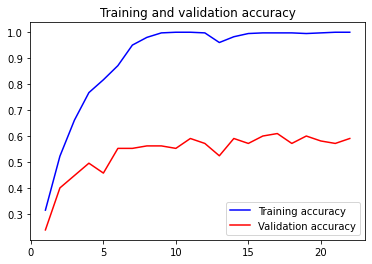

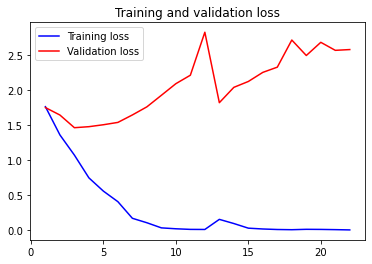

In [43]:
acc = answer_2.history['accuracy']
val_acc = answer_2.history['val_accuracy']
loss = answer_2.history['loss']
val_loss = answer_2.history['val_loss']
 
epochs = range(1,len(acc)+1)
 
plt.figure()
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
#plt.savefig('Accuracy.jpg')
 
plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [46]:
y_test = model_std_2.predict(test_flow_std)
y_test = np.argmax(y_test, axis=1)

In [50]:
accuracy = accuracy_score(test_flow_std.classes, y_test)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 8.6% 


Image Data Augmentation

In [44]:
model_aug_1 = std_model(target_size)
model_aug_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 198, 198, 8)       224       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 99, 99, 8)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 97, 97, 16)        1168      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 46, 46, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 23, 23, 32)       

In [19]:
early_stopping = EarlyStopping(monitor="val_accuracy", 
                               patience=5,
                               restore_best_weights=True)

In [45]:
model_aug_1.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

answer_3 = model_aug_1.fit(train_flow_aug,
                           validation_data=valid_flow_aug,
                           callbacks=[early_stopping],
                           epochs=100)

Epoch 1/100
13/13 [==============================] - 24s 2s/step - loss: 2.1086 - accuracy: 0.1658 - val_loss: 1.9375 - val_accuracy: 0.1905
Epoch 2/100
13/13 [==============================] - 23s 2s/step - loss: 1.9185 - accuracy: 0.1832 - val_loss: 1.8748 - val_accuracy: 0.2095
Epoch 3/100
13/13 [==============================] - 23s 2s/step - loss: 1.8372 - accuracy: 0.2351 - val_loss: 1.7895 - val_accuracy: 0.2857
Epoch 4/100
13/13 [==============================] - 23s 2s/step - loss: 1.7419 - accuracy: 0.2847 - val_loss: 1.8042 - val_accuracy: 0.2286
Epoch 5/100
13/13 [==============================] - 23s 2s/step - loss: 1.7162 - accuracy: 0.3292 - val_loss: 1.7175 - val_accuracy: 0.3714
Epoch 6/100
13/13 [==============================] - 23s 2s/step - loss: 1.5915 - accuracy: 0.3515 - val_loss: 1.7183 - val_accuracy: 0.3048
Epoch 7/100
13/13 [==============================] - 24s 2s/step - loss: 1.5128 - accuracy: 0.4431 - val_loss: 1.6202 - val_accuracy: 0.3810
Epoch 8/100
1

In [52]:
y_test = model_aug_1.predict(test_flow_aug)
y_test = np.argmax(y_test, axis=1)

In [53]:
accuracy = accuracy_score(test_flow_aug.classes, y_test)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 21.4% 


Adding more patience

In [27]:
model_aug_pat = aug_model(target_size)
model_aug_pat.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 64)       

In [28]:
early_stopping = EarlyStopping(monitor="val_loss", 
                               patience=10,
                               restore_best_weights=True)

In [29]:
model_aug_pat.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

model_aug_pat.fit(train_flow,
          validation_data=valid_flow,
          callbacks=[early_stopping],
          epochs=100)

Epoch 1/100
13/13 [==============================] - 29s 2s/step - loss: 2.1725 - accuracy: 0.1584 - val_loss: 1.8898 - val_accuracy: 0.1429
Epoch 2/100
13/13 [==============================] - 24s 2s/step - loss: 1.8752 - accuracy: 0.2153 - val_loss: 1.8452 - val_accuracy: 0.2857
Epoch 3/100
13/13 [==============================] - 26s 2s/step - loss: 1.8145 - accuracy: 0.2475 - val_loss: 1.8569 - val_accuracy: 0.3238
Epoch 4/100
13/13 [==============================] - 27s 2s/step - loss: 1.7444 - accuracy: 0.3342 - val_loss: 1.7239 - val_accuracy: 0.3429
Epoch 5/100
13/13 [==============================] - 24s 2s/step - loss: 1.6580 - accuracy: 0.3564 - val_loss: 1.7360 - val_accuracy: 0.3048
Epoch 6/100
13/13 [==============================] - 25s 2s/step - loss: 1.5324 - accuracy: 0.3985 - val_loss: 1.5800 - val_accuracy: 0.4381
Epoch 7/100
13/13 [==============================] - 25s 2s/step - loss: 1.3894 - accuracy: 0.4629 - val_loss: 1.6272 - val_accuracy: 0.4095
Epoch 8/100
1

Transfer learning

VGG19

In [33]:
base_model = VGG19(weights="imagenet", include_top=False, input_shape=target_size)

In [34]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [51]:
layer_name = 'block3_pool'
my_model = Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)

In [52]:
top_model = Sequential()
top_model.add(Flatten())
top_model.add(Dense(110, "relu"))
top_model.add(Dense(n_classes, "softmax"))

In [53]:
transfer_model = Sequential()
transfer_model.add(my_model)
transfer_model.add(top_model)

base_model.layers[0].trainable = False

In [54]:
transfer_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_5 (Functional)    (None, 25, 25, 256)       2325568   
_________________________________________________________________
sequential_12 (Sequential)   (None, 7)                 17600887  
Total params: 19,926,455
Trainable params: 19,926,455
Non-trainable params: 0
_________________________________________________________________


In [55]:
train_generator = ImageDataGenerator(rescale=1/255, rotation_range=45, zoom_range=0.1, horizontal_flip=True)
valid_generator = ImageDataGenerator(rescale=1/255)

train_flow = train_generator.flow_from_directory(train_path,
                                                 target_size=target_size[0:2],
                                                 batch_size=32,
                                                 class_mode="categorical")
valid_flow = valid_generator.flow_from_directory(val_path,
                                                 target_size=target_size[0:2],
                                                 batch_size=32,
                                                 class_mode="categorical")

Found 404 images belonging to 7 classes.
Found 105 images belonging to 7 classes.


In [56]:
early_stopping = EarlyStopping(monitor="val_accuracy", 
                               patience=5,
                               restore_best_weights=True)

In [57]:
transfer_model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

transfer_model.fit(train_flow,
          validation_data=valid_flow,
          callbacks=[early_stopping],
          epochs=100)

Epoch 1/100
13/13 [==============================] - 289s 22s/step - loss: 253.6700 - accuracy: 0.1559 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 2/100
13/13 [==============================] - 279s 21s/step - loss: 1.9462 - accuracy: 0.1460 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 3/100
13/13 [==============================] - 283s 22s/step - loss: 1.9464 - accuracy: 0.1312 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 4/100
13/13 [==============================] - 272s 21s/step - loss: 1.9457 - accuracy: 0.1460 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 5/100
12/13 [==========================>...] - ETA: 19s - loss: 1.9459 - accuracy: 0.1398

KeyboardInterrupt: 

Xception

In [34]:
base_model_2 = Xception(weights="imagenet", include_top=False, input_shape=target_size)

In [35]:
base_model_2.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 99, 99, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 99, 99, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 99, 99, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [36]:
top_model_2 = Sequential()
top_model_2.add(Flatten())
top_model_2.add(Dense(110, "relu"))
top_model_2.add(Dense(n_classes, "softmax"))

In [37]:
transfer_model_2 = Sequential()
transfer_model_2.add(base_model_2)
transfer_model_2.add(top_model_2)

transfer_model_2.layers[0].trainable = False

In [38]:
transfer_model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
sequential_5 (Sequential)    (None, 7)                 11039607  
Total params: 31,901,087
Trainable params: 11,039,607
Non-trainable params: 20,861,480
_________________________________________________________________


In [39]:
train_generator = ImageDataGenerator(rescale=1/255)
valid_generator = ImageDataGenerator(rescale=1/255)

train_flow = train_generator.flow_from_directory(train_path,
                                                 target_size=target_size[0:2],
                                                 batch_size=32,
                                                 class_mode="categorical")
valid_flow = valid_generator.flow_from_directory(val_path,
                                                 target_size=target_size[0:2],
                                                 batch_size=32,
                                                 class_mode="categorical")

Found 404 images belonging to 7 classes.
Found 105 images belonging to 7 classes.


In [40]:
early_stopping = EarlyStopping(monitor="val_accuracy", 
                               patience=5,
                               restore_best_weights=True)

In [ ]:
transfer_model_2.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

transfer_model_2.fit(train_flow,
          validation_data=valid_flow,
          callbacks=[early_stopping],
          epochs=100)

Epoch 1/100
13/13 [==============================] - 68s 5s/step - loss: 10.9516 - accuracy: 0.3168 - val_loss: 2.7493 - val_accuracy: 0.6286
Epoch 2/100
13/13 [==============================] - 63s 5s/step - loss: 1.2670 - accuracy: 0.7500 - val_loss: 1.5095 - val_accuracy: 0.6952
Epoch 3/100
13/13 [==============================] - 63s 5s/step - loss: 0.3934 - accuracy: 0.8812 - val_loss: 2.1707 - val_accuracy: 0.6381
Epoch 4/100
13/13 [==============================] - 65s 5s/step - loss: 0.1550 - accuracy: 0.9554 - val_loss: 1.1351 - val_accuracy: 0.7905
Epoch 5/100
13/13 [==============================] - 63s 5s/step - loss: 0.0328 - accuracy: 0.9876 - val_loss: 1.0178 - val_accuracy: 0.7714
Epoch 6/100
13/13 [==============================] - 69s 5s/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 1.1149 - val_accuracy: 0.7905
Epoch 7/100
13/13 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 1.0000

Xception Augmented

In [8]:
base_model_3 = Xception(weights="imagenet", include_top=False, input_shape=target_size)

In [9]:
base_model_3.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 99, 99, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 99, 99, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 99, 99, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [15]:
top_model_3 = Sequential()
top_model_3.add(Flatten())
top_model_3.add(Dense(110, "relu"))
top_model_3.add(Dense(n_classes, "softmax"))

In [18]:
transfer_model_3 = Sequential()
transfer_model_3.add(base_model_3)
transfer_model_3.add(top_model_3)

transfer_model_3.layers[0].trainable = False

In [22]:
transfer_model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
sequential_1 (Sequential)    (None, 7)                 11039607  
Total params: 31,901,087
Trainable params: 11,039,607
Non-trainable params: 20,861,480
_________________________________________________________________


In [23]:
train_generator = ImageDataGenerator(rescale=1/255, rotation_range=45, zoom_range=0.1, horizontal_flip=True)
valid_generator = ImageDataGenerator(rescale=1/255)

train_flow = train_generator.flow_from_directory(train_path,
                                                 target_size=target_size[0:2],
                                                 batch_size=32,
                                                 class_mode="categorical")
valid_flow = valid_generator.flow_from_directory(val_path,
                                                 target_size=target_size[0:2],
                                                 batch_size=32,
                                                 class_mode="categorical")

Found 404 images belonging to 7 classes.
Found 105 images belonging to 7 classes.


In [24]:
early_stopping = EarlyStopping(monitor="val_accuracy", 
                               patience=5,
                               restore_best_weights=True)

In [25]:
transfer_model_3.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

transfer_model_3.fit(train_flow,
          validation_data=valid_flow,
          callbacks=[early_stopping],
          epochs=100)

Epoch 1/100
13/13 [==============================] - 69s 5s/step - loss: 7.4577 - accuracy: 0.3911 - val_loss: 3.9587 - val_accuracy: 0.4286
Epoch 2/100
13/13 [==============================] - 64s 5s/step - loss: 1.9203 - accuracy: 0.6064 - val_loss: 1.7647 - val_accuracy: 0.5524
Epoch 3/100
13/13 [==============================] - 66s 5s/step - loss: 0.8868 - accuracy: 0.7327 - val_loss: 1.3313 - val_accuracy: 0.6762
Epoch 4/100
13/13 [==============================] - 70s 5s/step - loss: 0.6401 - accuracy: 0.8317 - val_loss: 1.5527 - val_accuracy: 0.6381
Epoch 5/100
13/13 [==============================] - 65s 5s/step - loss: 0.5827 - accuracy: 0.8144 - val_loss: 1.7100 - val_accuracy: 0.6095
Epoch 6/100
13/13 [==============================] - 65s 5s/step - loss: 0.4790 - accuracy: 0.8465 - val_loss: 1.3794 - val_accuracy: 0.6952
Epoch 7/100
13/13 [==============================] - 66s 5s/step - loss: 0.4619 - accuracy: 0.8738 - val_loss: 1.1951 - val_accuracy: 0.7429
Epoch 8/100
1